In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/content/sample_data/Maternal Health Risk Data Set.csv")

In [3]:
df.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk


**Maternal Health Risk using EDA and machine learning¶**


Many pregnant women die from pregnancy issues as a result of a lack of information on maternal health care during and after pregnancy. It is more common in rural regions and among lower-middle-class families in emerging countries. During pregnancy, every minute should be observed to ensure the proper growth of the baby and the safe delivery.

In [4]:
df.shape

(1014, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
df.isnull().sum()


,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [8]:
df.shape

(1014, 7)

In [9]:
df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


<Axes: xlabel='count', ylabel='RiskLevel'>

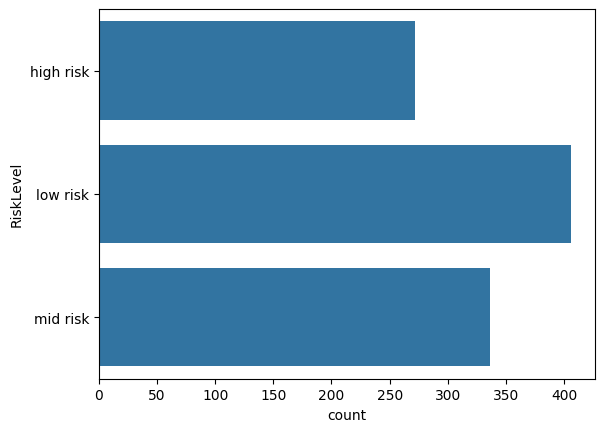

In [10]:
sns.countplot(df['RiskLevel'])

**My Observation:** I have an imbalanced dataset in the traget class distribution

In [11]:
df['RiskLevel'].replace({"low risk":0,"mid risk":1,"high risk":2}, inplace=True)

<ipython-input-11-a9629d54421b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RiskLevel'].replace({"low risk":0,"mid risk":1,"high risk":2}, inplace=True)
<ipython-input-11-a9629d54421b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RiskLevel'].replace({"low risk":0,"mid risk":1,"high 

In [12]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


<Axes: >

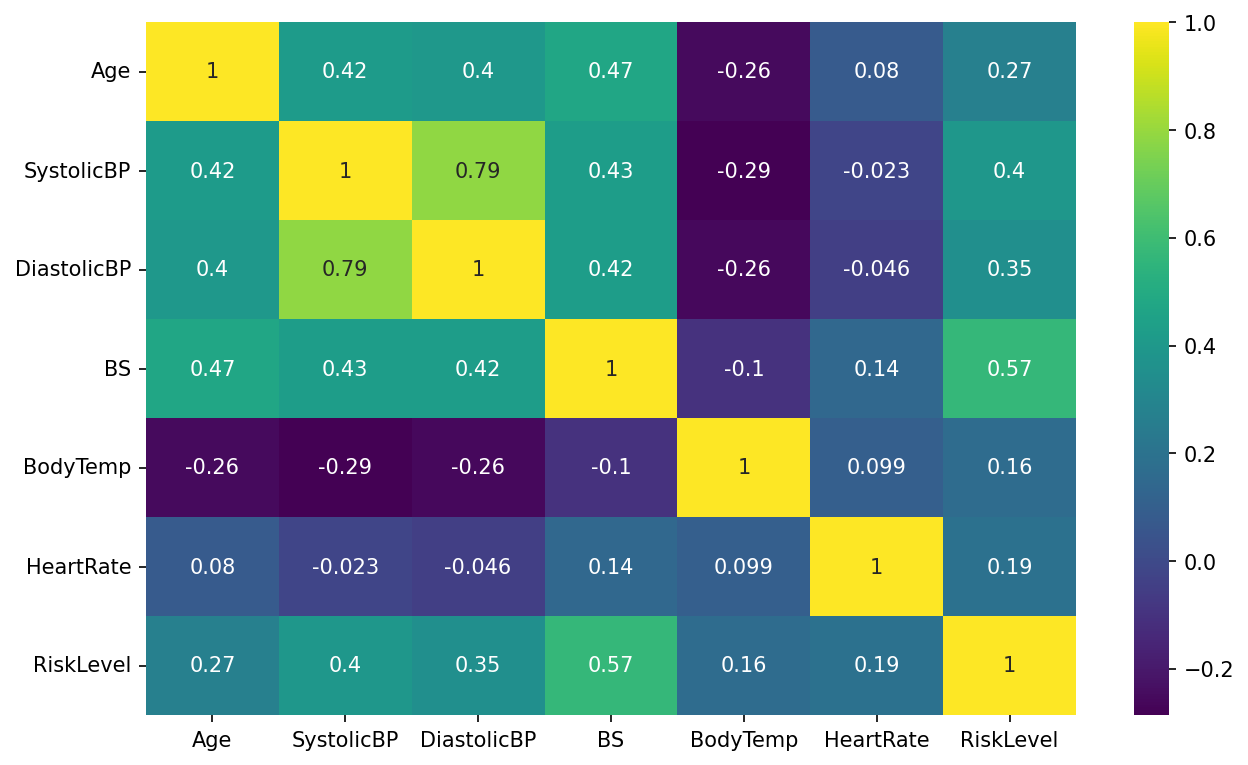

In [13]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [14]:
df.drop(['DiastolicBP'],axis=1,inplace=True)

In [15]:
df.to_csv('df.csv', index=False)

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
# X.BodyTemp = (X.BodyTemp - 32)*5/9 #Converting BodyTemp to C from F

In [18]:
X.head()

,Age,SystolicBP,BS,BodyTemp,HeartRate
0,25,130,15.0,98.0,86
1,35,140,13.0,98.0,70
2,29,90,8.0,100.0,80
3,30,140,7.0,98.0,70
4,35,120,6.1,98.0,76


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,ytrain=smote.fit_resample(xtrain.astype('float'),ytrain)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.9 MB/s eta 0:00:00


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train_smote.values)
x_test = sc.transform(xtest.values)

In [22]:
import pickle
filename='sc_model.sav'
pickle.dump(sc, open(filename, 'wb'))

In [23]:
gama = np.arange(0.01, 15, 0.1)
c_vals = np.arange(0.1, 15, 0.5)


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf']  # Kernel type
}


In [26]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(x_train, ytrain)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [27]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}


In [28]:
best_svm = SVC(**best_params)
best_svm.fit(x_train, ytrain)

SVC(C=100, gamma=10)

In [29]:
ypred = best_svm.predict(x_train)
accuracy = accuracy_score(ytrain, ypred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9284253578732107


In [30]:
ypred = best_svm.predict(x_test)
accuracy = accuracy_score(ytest, ypred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7635467980295566


svm Classification Report:

 svm Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75        80
           1       0.74      0.80      0.77        76
           2       0.69      0.87      0.77        47

    accuracy                           0.76       203
   macro avg       0.76      0.78      0.76       203
weighted avg       0.78      0.76      0.76       203



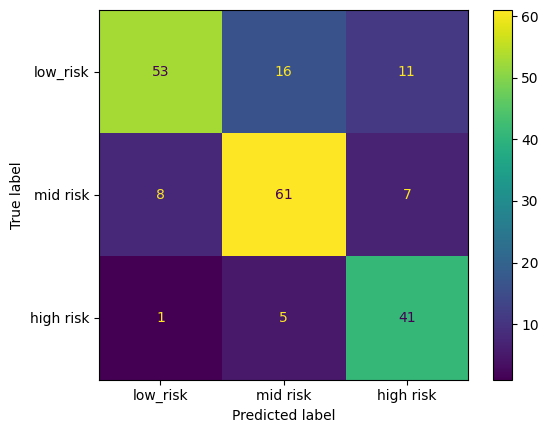

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("svm Classification Report:")
print("\n svm Classification Report:")
print(classification_report(ytest, ypred))

from sklearn.metrics import ConfusionMatrixDisplay
clf_R = confusion_matrix(ytest,ypred)
cx_ = ConfusionMatrixDisplay(clf_R,display_labels=['low_risk','mid risk','high risk']).plot()
plt.show()

In [32]:
X.to_csv('dat.csv', index=False)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


best_rf.fit(x_train, ytrain)


y_pred = best_rf.predict(x_train)


accuracy = accuracy_score(ytrain, y_pred)
print("Tuned Random Forest Accuracy: {:.2f}%".format(accuracy * 100))


print("Best Hyperparameters:", best_params)

Tuned Random Forest Accuracy: 94.27%
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


best_rf.fit(x_train, ytrain)


y_pred = best_rf.predict(x_test)


accuracy = accuracy_score(ytest, y_pred)
print("Tuned Random Forest Accuracy: {:.2f}%".format(accuracy * 100))


print("Best Hyperparameters:", best_params)

Tuned Random Forest Accuracy: 80.30%
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Random Forest Report:

 Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        80
           1       0.73      0.83      0.78        76
           2       0.87      0.85      0.86        47

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



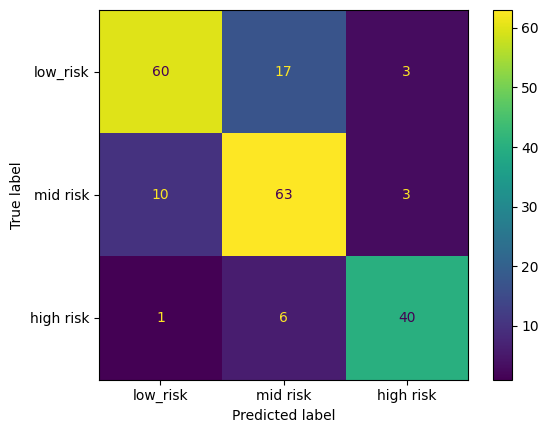

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("Random Forest Report:")
print("\n Random Forest Report:")
print(classification_report(ytest, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
clf_R = confusion_matrix(ytest,y_pred)
cx_ = ConfusionMatrixDisplay(clf_R,display_labels=['low_risk','mid risk','high risk']).plot()
plt.show()

In [36]:
import pickle
pickle.dump(best_svm,open('model_S.pkl','wb'))

In [37]:
import pickle
pickle.dump(best_rf,open('model_R.pkl','wb'))

In [45]:
input_data=[25,130,15.0,98.0,86]
np_data=np.asarray(input_data)
Re_data=np_data.reshape(1,-1)

sc_model=pickle.load(open('sc_model.sav', 'rb'))
loaded_model=pickle.load(open('model_R.pkl', 'rb'))

R_data=sc_model.transform(Re_data)
prediction=loaded_model.predict(R_data)
print(prediction)

if (prediction[0] == 0):
    print('low risk')
if (prediction[0] == 1):
    print('mid risk')
if (prediction[0] == 2):
     print('high risk')

[2]
high risk


In [39]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [40]:
# ! pip install streamlit -q


In [41]:
# !wget -q -O - ipv4.icanhazip.com


In [42]:
# ! streamlit run app.py & npx localtunnel --port 8501